In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='67e68ea0-ec4c-44b9-aefb-1599604634c7', project_access_token='p-9e00a5da772e2686731bca23576cfb5544a5fb87')
pc = project.project_context


In [9]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
!pip install --upgrade --user pyflux
import pyflux as pf

Requirement already up-to-date: pyflux in /home/dsxuser/.local/lib/python3.5/site-packages
Requirement not upgraded as not directly required: scipy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyflux)
Requirement not upgraded as not directly required: patsy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyflux)
Requirement not upgraded as not directly required: numdifftools in /home/dsxuser/.local/lib/python3.5/site-packages (from pyflux)
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyflux)
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyflux)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from patsy->pyflux)
Requirement not upgraded as not directly required: algopy>=0.4 in /home/dsxuser/.local/lib/python3.5/site-packages (fr

In [4]:
data_a = pd.read_csv(project.get_file('cpu-full-a.csv'), parse_dates=[0], infer_datetime_format=True)

In [5]:
data_train_a = pd.read_csv(project.get_file('cpu-train-a.csv'), parse_dates=[0], infer_datetime_format=True)
data_test_a = pd.read_csv(project.get_file('cpu-test-a.csv'), parse_dates=[0], infer_datetime_format=True)

In [7]:
data_b = pd.read_csv(project.get_file('cpu-full-b.csv'), parse_dates=[0], infer_datetime_format=True)
data_train_b = pd.read_csv(project.get_file('cpu-train-b.csv'), parse_dates=[0], infer_datetime_format=True)
data_test_b = pd.read_csv(project.get_file('cpu-test-b.csv'), parse_dates=[0], infer_datetime_format=True)

Text(0.5,1,'CPU Utilization')

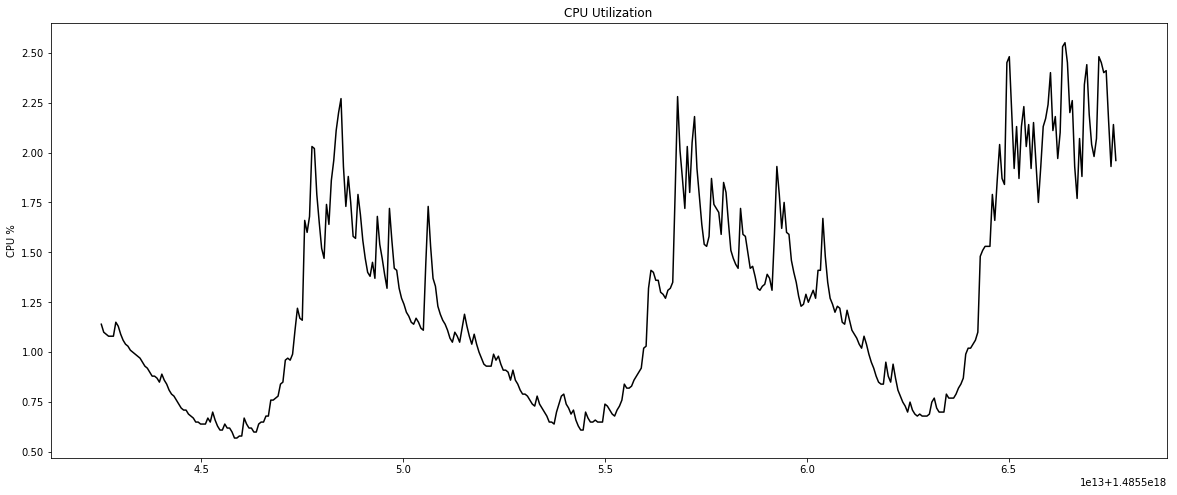

In [10]:
plt.figure(figsize=(20,8))
plt.plot(data_train_a['datetime'], data_train_a['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')

Text(0.5,1,'CPU Utilization')

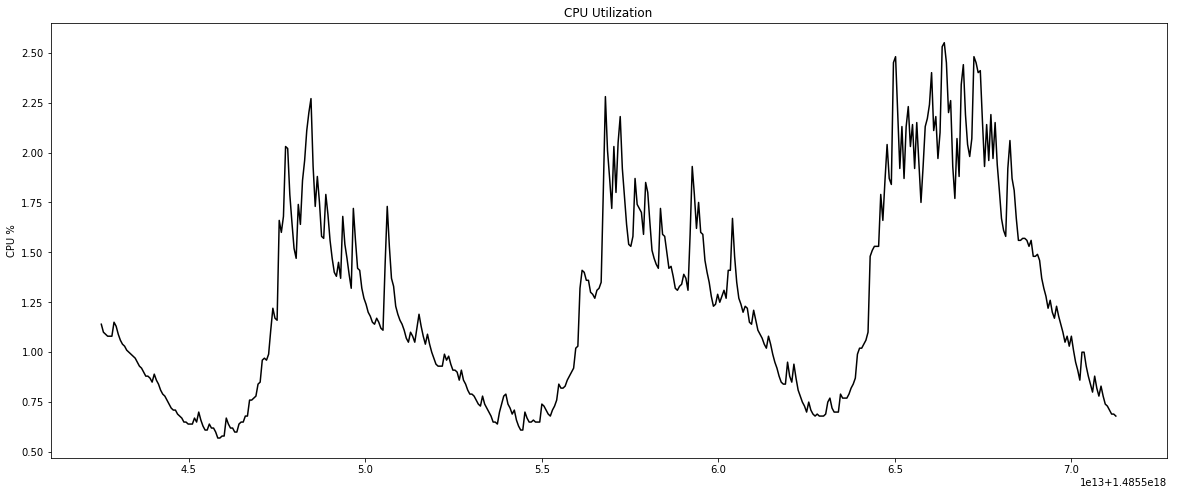

In [16]:
plt.figure(figsize=(20,8))
plt.plot(data_a['datetime'], data_a['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')
#plt.axvspan(xmin=pd.Timestamp(datetime(2017,1,28,1,42)), xmax=pd.Timestamp(datetime(2017,1,28,2,41)), color='#d4d4d4')

Text(0.5,1,'CPU Utilization')

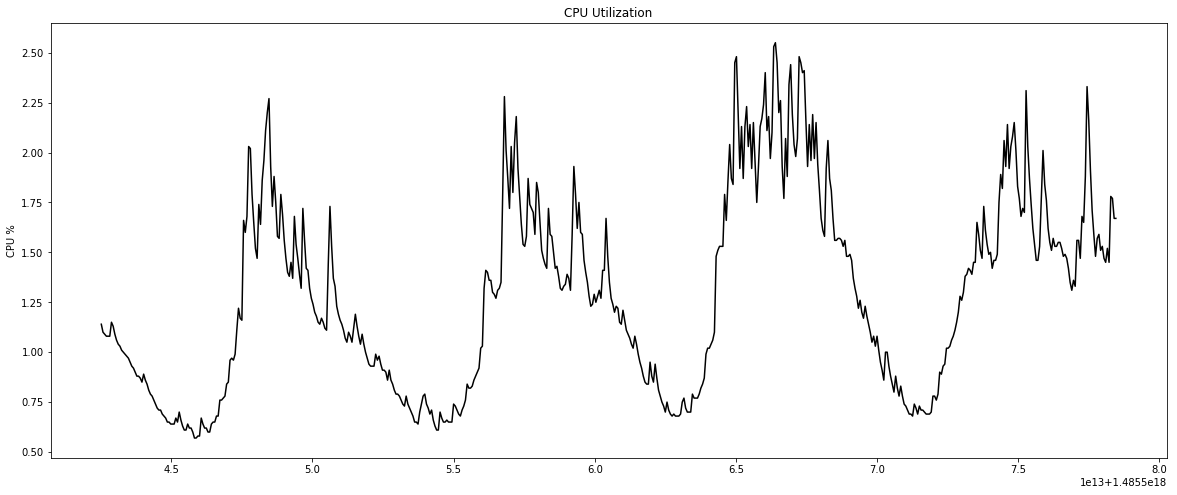

In [15]:
plt.figure(figsize=(20,8))
plt.plot(data_train_b['datetime'], data_train_b['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')

Text(0.5,1,'CPU Utilization')

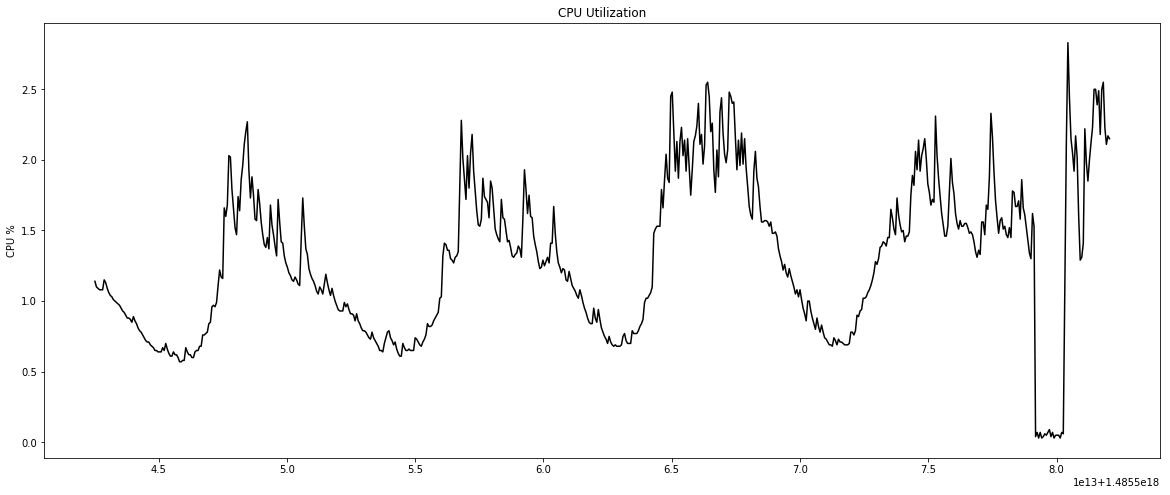

In [18]:
plt.figure(figsize=(20,8))
plt.plot(data_b['datetime'], data_b['cpu'], color='black')
plt.ylabel('CPU %')
plt.title('CPU Utilization')
#plt.axvspan(xmin=pd.Timestamp(datetime(2017,1,28,4,42)), xmax=pd.Timestamp(datetime(2017,1,28,5,41)), color='#d4d4d4')

In [ ]:
model_a = pf.ARIMA(data=data_train_a, ar=11, ma=11, integ=0, target='cpu')
x = model_a.fit("M-H")
model_a.plot_fit(figsize=(20,8))
model_a.plot_predict(h=60,past_values=100,figsize=(20,8))

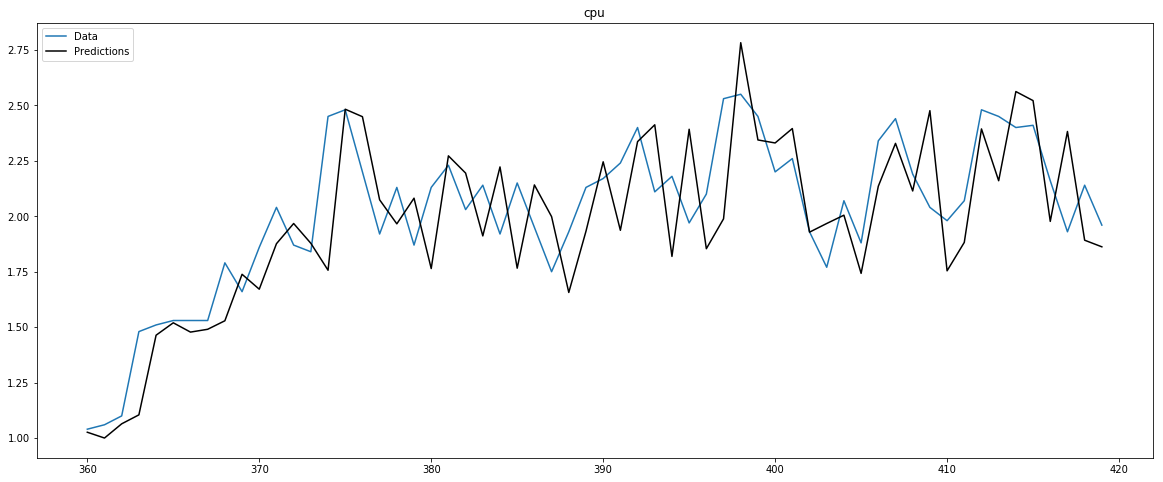

In [10]:
model_a.plot_predict_is(h=60, figsize=(20,8))

Acceptance rate of Metropolis-Hastings is 0.0
Acceptance rate of Metropolis-Hastings is 0.01015
Acceptance rate of Metropolis-Hastings is 0.12605
Acceptance rate of Metropolis-Hastings is 0.1772
Acceptance rate of Metropolis-Hastings is 0.31005

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.28415


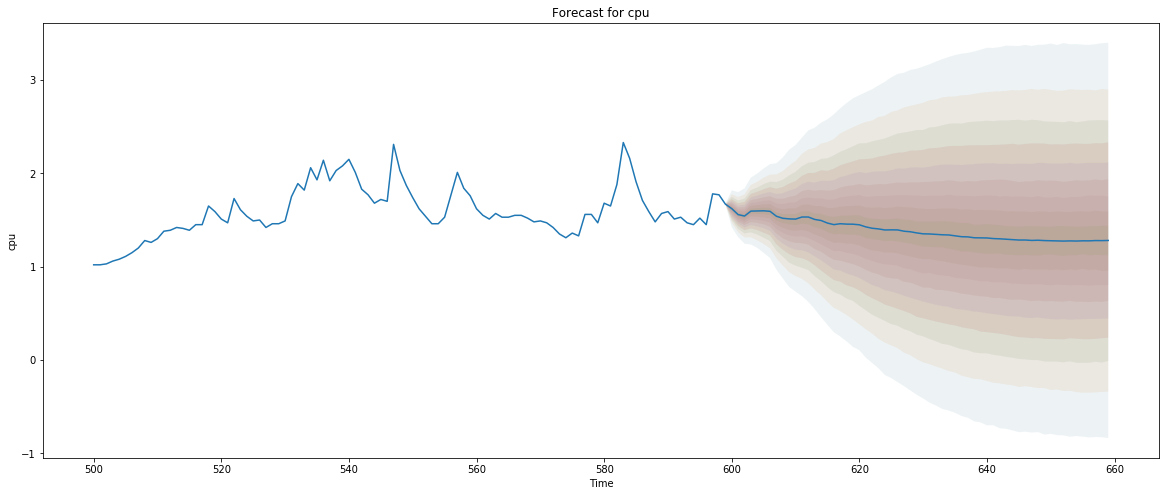

In [11]:
model_b = pf.ARIMA(data=data_train_b, ar=11, ma=11, integ=0, target='cpu')
x = model_b.fit("M-H")
model_b.plot_predict(h=60,past_values=100,figsize=(20,8))